## Tensorflow Keras

## 비선형회귀 구현

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def Visualize(x_data, y_data, predictions):
    # 데이터 출력
    plt.scatter(x_data,y_data)
    plt.savefig('data.png')

    # 곡선형 분포 데이터와 예측값 출력
    plt.scatter(x_data,predictions, color='red')
    plt.savefig('prediction.png')

In [9]:
import tensorflow as tf
import numpy as np

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Keras 
텐서플로우 내의 딥러닝 모델 설계와 훈련을 위한 API

* 연속적으로(Sequential) 레이어(Layer)들을 쌓아가며 모델을 생성하고,<br> 사이킷런과 같이 한 줄의 코드로 간단하게 학습 방법 설정, 학습, 평가를 진행할 수 있다.


#### 함수 / 메서드
* tf.keras.models.Sequential() : 연속적으로 층을 쌓아 만드는 Sequential 모델을 위한 함수
* model.complie() : 학습 방법 설정
* model.fit() : 모델 학습
* model.predict() : 학습된 모델로 예측값 생성
* tf.keras.layers.Dense(units, activation) : 신경망 모델의 레이어를 구성하는데 필요한 keras 함수
    * units: 레이어 안의 노드 수
    * activation: 적용할 activation function

> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

---

### 다층 퍼셉트론 모델
* 입력층 (Input layer):
입력되는 데이터의 차원에 따라 input_dim에 적절한 값을 설정 
    * dim : dimension, 차원<br><br>
        
* 출력층 (Output layer):
출력해야 하는 결괏값의 개수만큼 노드의 개수를 설정

### 모델 학습 방법 설정
손실 함수 계산 방법과 최적화 방법 설정
* 손실 함수(loss) : ‘mean_squared_error’

* 최적화 방법(optimizer) : ‘adam’

### 모델 학습
#### verbose
verbose: Integer. 0, 1, or 2. 
Verbosity mode. 


0 = silent, <br>
1 = progress bar, <br>
2 = one line per epoch.

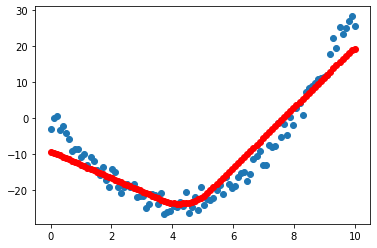

In [11]:
np.random.seed(100)
tf.random.set_seed(100)

def main():
    
    # 비선형 데이터 생성
    
    x_data = np.linspace(0, 10, 100)
    y_data = 1.5 * x_data**2 -12 * x_data + np.random.randn(*x_data.shape)*2 + 0.5
    
    '''
    1. 다층 퍼셉트론 모델 
    '''
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(20, input_dim=1, activation= 'relu'),
        tf.keras.layers.Dense(20, activation = 'relu'),
        tf.keras.layers.Dense(1)
        
        ])
    
    '''
    2. 모델 학습 방법 설정 
    '''
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    '''
    3. 모델 학습 
    ''' 
    
    history = model.fit(x_data, y_data, epochs=500, verbose = 0)
    
    '''
    4. 예측값 생성 및 저장
    
    '''
    
    predictions = model.predict(x_data)
    
    Visualize(x_data, y_data, predictions)
    
    return history, model

if __name__ == '__main__':
    main()